In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from os import path

% matplotlib inline

In [2]:
def define_modo_colisao(valor):
    if type(valor) is str:
        raise Exception('parâmetro não pode ser uma string')
    if valor <= 100:
        return 0
    elif valor <= 200:
        return 1
    elif valor <= 300:
        return 2
    else:
        raise Exception('não foi possivel identificar o modo de colisão:\nparâmetro {0}'.format(valor))

In [3]:
SOURCE = 'simulacao_4.2.7_CLBin_p=0.7'
FILE_1 = 'dataPowerFromAppLayer.csv'
FILE_2 = 'dataTaxaMacFromMacLayer.csv'

dfPotencia = pd.read_csv(path.join(SOURCE,FILE_1),names=['tempo', 'node','potencia', 'repeticao'],delimiter='|')
dfTaxaMAC = pd.read_csv(path.join(SOURCE, FILE_2),names=['tempo', 'node', 'taxaMAC', 'repeticao'],delimiter='|')

dfPotencia['Modo de colisao'] = dfPotencia['repeticao'].apply(define_modo_colisao)
dfTaxaMAC['Modo de colisao'] = dfTaxaMAC['repeticao'].apply(define_modo_colisao)

In [4]:
dfPotencia.head()

,tempo,node,potencia,repeticao,Modo de colisao
0,1.245767,4,-12,1,0
1,1.273110,5,-10,1,0
2,1.468203,3,-12,1,0
3,1.477734,1,-15,1,0
4,1.483515,5,-12,1,0


In [5]:
dfTaxaMAC.head()

,tempo,node,taxaMAC,repeticao,Modo de colisao
0,1.245767,4,60,1,0
1,1.273110,5,40,1,0
2,1.468203,3,60,1,0
3,1.477734,1,20,1,0
4,1.483515,5,100,1,0


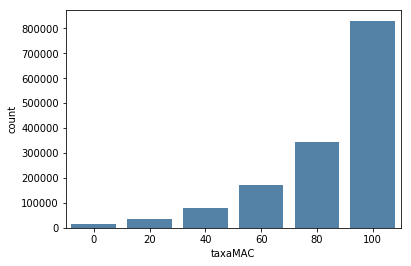

In [6]:
sns.countplot(x='taxaMAC', data=dfTaxaMAC, color='steelblue')

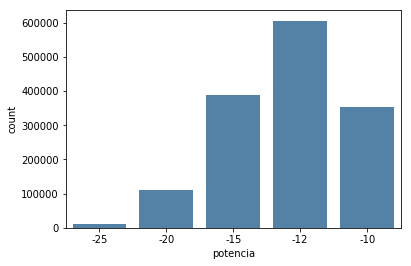

In [7]:
sns.countplot(x='potencia', data=dfPotencia, color='steelblue')

In [8]:
def barchart_frequencia_potencia(dados,ylim=(0,2500)):
    '''Plota gráfico de barras com a contagem das ocorrências dos valores assumidos pela potencia.'''
    plt.figure(figsize=(12,8))
    plt.title('Frequência Absoluta - Potência')
    plt.xlabel('potência')
    fig = sns.countplot(x='potencia', data=dados)
    fig.set(ylim=ylim)

    return fig

def calcula_porcentagem_potencia(dados, repeticao = 0):
    if repeticao != 0:
        dados = dados[dados["repeticao"] == repeticao]
    df = dados.groupby(by="potencia",as_index=False).count()
    total = df["node"].sum()
    resultado = DataFrame()
    resultado["freq_absoluta"] = df["node"]
    resultado["freq_relativa"] = 100 * (df["node"] / total)
    return resultado

def barchart_porcentagem_potencia(dataFrame,repeticao=0):
    df = dataFrame.groupby(by="potencia",as_index=False).count()
    total = df["node"].sum()
    df["porcentagem"] = 100 * (df["node"] / total)
    plt.figure(figsize=(12,8))
    plt.title('Frequência Relativa - Potência')
    plt.xlabel('potência')
    fig = sns.barplot(x="potencia", y="porcentagem",data=df, color='steelblue')

    return fig

In [9]:
df = calcula_porcentagem_potencia(dfPotencia)
df.T

,0,1,2,3,4
freq_absoluta,11878.000000,111286.000000,389519.00000,605460.000000,353486.000000
freq_relativa,0.807133,7.562096,26.46856,41.142163,24.020049


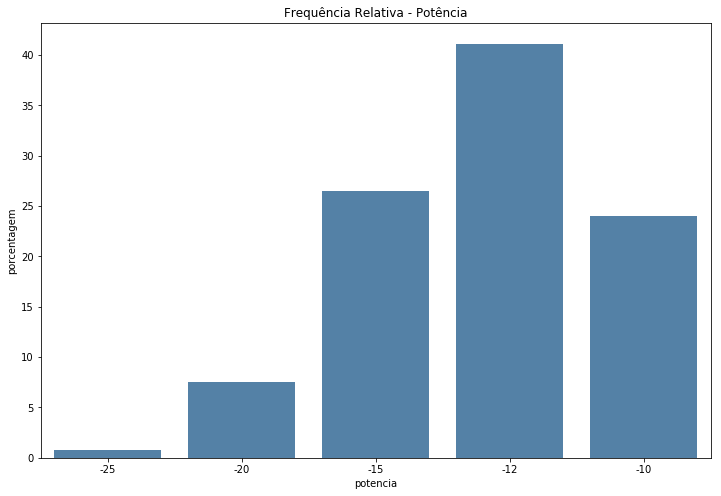

In [10]:
barchart_porcentagem_potencia(dfPotencia)

In [11]:
from scipy.stats import binom

n, p = 4, 0.7
rv = binom(n,p)

x= np.arange(0,5,1)
y = rv.pmf(x)

print(x)
print(y * 100)

[0 1 2 3 4]
[ 0.81  7.56 26.46 41.16 24.01]


In [50]:
rv.var()

0.8400000000000001

In [51]:
rv.mean()

2.8

In [52]:
4 * 0.7

2.8